### Text Classification(Sentiment Analysis)with Keras and TFIDF Vectorizer

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset
\t-Tab

In [2]:
import pandas as pd
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

### Preprocess the text
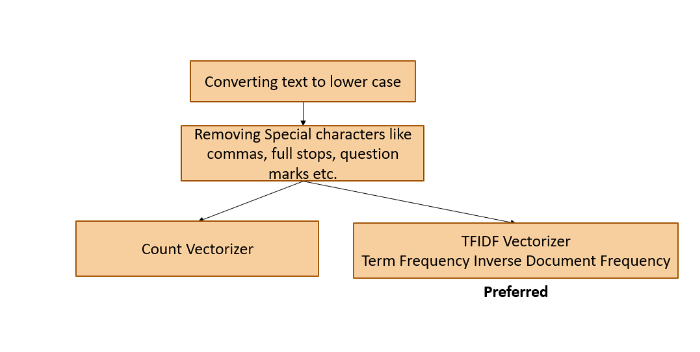

In [4]:
s='Hi All, Welcome to Sentiment Analysis Class.........'
s=s.lower()
s

'hi all, welcome to sentiment analysis class.........'

In [6]:
import re
pre=re.sub("[^a-z ]",'',s).strip()
pre

'hi all welcome to sentiment analysis class'

### Create a text preprocessing function

In [7]:
def preprocess_text(st):
    st=st.lower()
    pre=re.sub("[^a-z ]",'',st).strip()
    return pre

In [8]:
preprocess_text('Welcome to our CLass!...')

'welcome to our class'

### Preprocess entire data in dataframe

In [9]:
df['Review_pre']=df['Review'].apply(preprocess_text)

In [10]:
df

,Review,Liked,Review_pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


### Separate X and Y

In [11]:
X=df['Review_pre']
X

0                                   wow loved this place
1                                      crust is not good
2               not tasty and the texture was just nasty
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                              appetite instantly gone
997    overall i was not impressed and would not go back
998    the whole experience was underwhelming and i t...
999    then as if i hadnt wasted enough of my life th...
Name: Review_pre, Length: 1000, dtype: object

In [12]:
Y=df['Liked']
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

### Create a TFIDF vectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
X_pre=tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
X_pre.shape

(1000, 1831)

### Apply train and test

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.25,random_state=42)

In [16]:
xtrain.shape

(750, 1831)

In [17]:
xtest.shape

(250, 1831)

### Create a simple neural network

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping

In [19]:
xtrain.shape[1]

1831

In [21]:
# Create the model
model=Sequential()

# Hidden Layer 1
model.add(Dense(256,activation='relu',input_dim=xtrain.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Hidden Layer 2
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Output Layer (Binary Classification-Sigmoid)
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)

In [24]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=200,callbacks=[early_stop],batch_size=8)

Epoch 1/200


75/75 [==============================] - 3s 10ms/step - loss: 0.9847 - accuracy: 0.5433 - val_loss: 0.6906 - val_accuracy: 0.5133
Epoch 2/200
75/75 [==============================] - 0s 6ms/step - loss: 0.7518 - accuracy: 0.6483 - val_loss: 0.6778 - val_accuracy: 0.5467
Epoch 3/200
75/75 [==============================] - 0s 6ms/step - loss: 0.5658 - accuracy: 0.7367 - val_loss: 0.6645 - val_accuracy: 0.5533
Epoch 4/200
75/75 [==============================] - 0s 6ms/step - loss: 0.4683 - accuracy: 0.7933 - val_loss: 0.6303 - val_accuracy: 0.6933
Epoch 5/200
75/75 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.7983 - val_loss: 0.5888 - val_accuracy: 0.7200
Epoch 6/200
75/75 [==============================] - 0s 6ms/step - loss: 0.3268 - accuracy: 0.8600 - val_loss: 0.5559 - val_accuracy: 0.7000
Epoch 7/200
75/75 [==============================] - 0s 6ms/step - loss: 0.2783 - accuracy: 0.8917 - val_loss: 0.5241 - val_accuracy: 0.7133
Epoch 8/20

### Learning Curve

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabels'

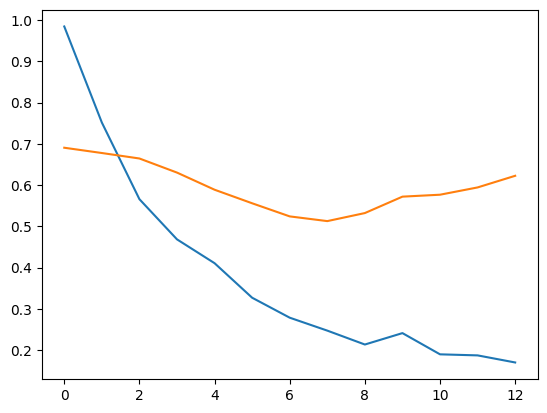

In [25]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabels('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [26]:
model.evaluate(xtrain,ytrain)

24/24 [==============================] - 0s 3ms/step - loss: 0.1372 - accuracy: 0.9400


[0.13721409440040588, 0.9399999976158142]

In [27]:
model.evaluate(xtest,ytest)

8/8 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.7280


[0.6528074741363525, 0.7279999852180481]

In [28]:
yprob_tr=model.predict(xtrain)
yprob_ts=model.predict(xtest)

8/8 [==============================] - 0s 2ms/step


In [29]:
yprob_tr[0:5]

array([[2.8747101e-03],
       [5.1018887e-04],
       [9.9856544e-01],
       [9.3635947e-01],
       [9.9779034e-01]], dtype=float32)

In [30]:
yprob_ts[0:5]

array([[0.098816  ],
       [0.992486  ],
       [0.9332619 ],
       [0.98677385],
       [0.95160383]], dtype=float32)

In [31]:
ypred_tr=[1 if i>=0.5 else 0 for i in yprob_tr]
ypred_ts=[1 if i>=0.5 else 0 for i in yprob_ts]

In [32]:
ypred_tr[0:5]

[0, 0, 1, 1, 1]

In [33]:
ytrain[0:5]

82     0
991    0
789    1
894    1
398    1
Name: Liked, dtype: int64

In [34]:
ypred_ts[0:5]

[0, 1, 1, 1, 1]

In [35]:
ytest[0:5]

521    1
737    1
740    1
660    1
411    1
Name: Liked, dtype: int64

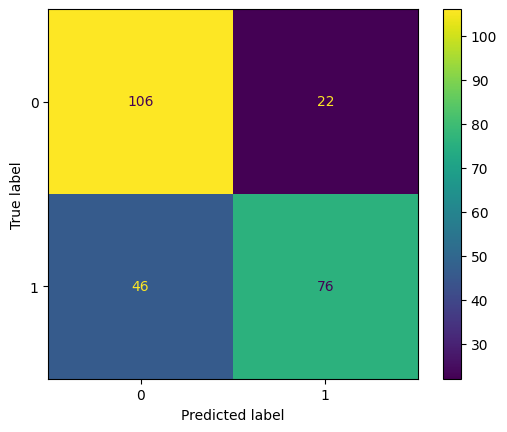

In [36]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()


In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       128
           1       0.78      0.62      0.69       122

    accuracy                           0.73       250
   macro avg       0.74      0.73      0.72       250
weighted avg       0.74      0.73      0.72       250



In [38]:
model.save('Sentiment.keras')

### Predicting own statements based on model

In [39]:
def predict_sentiment(st,tfidf,model):
    pre=preprocess_text(st)
    pre_tf=tfidf.transform([pre]).toarray()
    prob=model.predict(pre_tf)
    if prob>=0.5:
        print('Positive Review')
    else:
        print('Negative Review')
    return prob        

In [41]:
st='The Taste was good but the ambience was not so good'
predict_sentiment(st,tfidf,model)

1/1 [==============================] - 0s 39ms/step
Positive Review


array([[0.9756005]], dtype=float32)

In [43]:
st2='I did not like the place'
predict_sentiment(st2,tfidf,model)

1/1 [==============================] - 0s 35ms/step
Negative Review


array([[0.02487619]], dtype=float32)